In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(lemon)

exn <- readRDS(file = paste0("./load_files/", "ExN_data_raw_05242022.rds")) 
meta <- exn@meta.data

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lemon’


The following objects are masked from ‘package:ggplot2’:

    CoordCartesian, element_render




In [2]:
## Update cluster names
meta$subtype <- gsub("IPC EOMES NHLH1 deep", "IPC deep EOMES NHLH1", meta$subtype) %>%
                gsub("ExN deep nascent", "ExNDL SOX5 PALMD", .) %>%
                gsub("ExN deep KIF26A", "ExNDL SOX5 ID2", .) %>%
                gsub("ExN deep SYT6", "ExNDL SOX5 SYT6", .) %>%
                gsub("ExN deep NR4A2 GRID2", "ExNDL SOX5 NR4A2 GRID2", .) %>%
                gsub("ExN up KCNV1", "ExN SOX5 KCNV1", .) %>%
                gsub("ExN deep OPRK1 SULF1", "ExNDL SOX5 OPRK1 SULF1", .) %>%
                gsub("ExN deep OPRK1 NR4A2", "ExNDL SOX5 OPRK1 NR4A2", .) %>%
                gsub("IPC EOMES NHLH1 up", "IPC up EOMES NHLH1", .) %>%
                gsub("ExN up nascent", "ExNUL CUX2 PALMD", .) %>%
                gsub("ExN up ADRA2A", "ExNUL CUX2 ADRA2A", .) %>%
                gsub("ExN up ACTN2", "ExNUL CUX2 ACTN2", .) %>%
                gsub("ExN PCC NR4A3", "ExN TSHZ2 NR4A3", .) 
                

`summarise()` has grouped output by 'subtype'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'subtype'. You can override using the `.groups` argument.



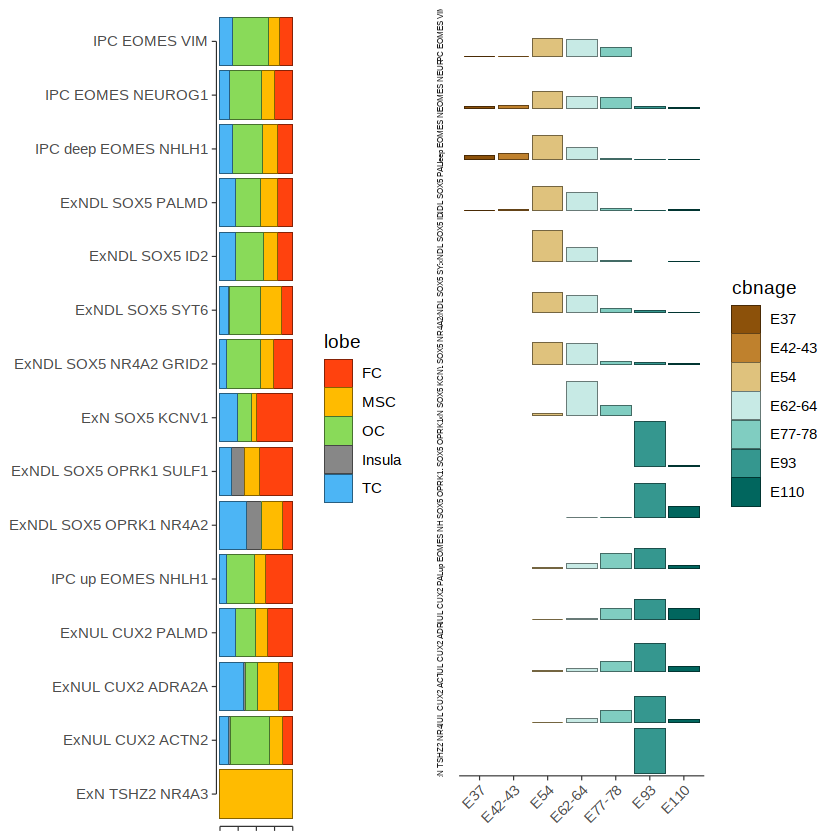

In [3]:
reg_cols <- c("#FF420E", "#FFBB00", "#4CB5F5", "#89DA59", "#878787", "#B037C4") %>% 
                setNames(., c("FC", "MSC", "TC", "OC", "Insula", "GE"))
age_cols <- c("#8c510a", "#bf812d", "#dfc27d", "#c7eae5", "#80cdc1", "#35978f", "#01665e") %>% 
                setNames(., c("E37", "E42-43", "E54", "E62-64", "E77-78", "E93", "E110"))



cls_ord <- c("IPC EOMES VIM", "IPC EOMES NEUROG1", 
                    "IPC deep EOMES NHLH1", "ExNDL SOX5 PALMD", "ExNDL SOX5 ID2", 
                     "ExNDL SOX5 SYT6", "ExNDL SOX5 NR4A2 GRID2", "ExN SOX5 KCNV1", 
                     "ExNDL SOX5 OPRK1 SULF1","ExNDL SOX5 OPRK1 NR4A2", 
                    "IPC up EOMES NHLH1", 
                     "ExNUL CUX2 PALMD", "ExNUL CUX2 ADRA2A", "ExNUL CUX2 ACTN2", "ExN TSHZ2 NR4A3")

split.by <- "lobe"
p1_data <- meta %>%
                group_by(subtype, !!sym(split.by)) %>%
                summarize(size = n()) %>%
                ungroup() %>% 
                group_by(subtype) %>%
                mutate(size = size * 100/sum(size)) %>%
                ungroup() %>%
                mutate(subtype = factor(subtype, levels = rev(cls_ord))) %>%
                mutate(!!sym(split.by) := factor(!!sym(split.by), 
                                    levels = switch(split.by, 
                                            lobe = c("FC", "MSC", "OC", "Insula", "TC"), 
                                            cbnage = c("E37", "E42-43", "E54", "E62-64", "E77-78", "E93", "E110"))))


p1 <- ggplot(p1_data, aes_string(x = "size", y = "subtype", fill = split.by)) +
                geom_bar(color = "black", position = position_stack(reverse = FALSE), stat = "identity", lwd = 0.1) +
                lemon::coord_capped_cart(bottom='both', left='both') +
                scale_fill_manual(values = reg_cols) +
                theme_classic() + 
                labs(y = "Cluster", x = "Sample Ratio") +
                theme(axis.line=element_line(size = 0.2), 
                      axis.ticks=element_line(size = 0.25), 
                      axis.text.x = element_blank(), 
                      axis.title = element_blank())


split.by <- "cbnage"
p2_data <- meta %>%
                group_by(subtype, !!sym(split.by)) %>%
                summarize(size = n()) %>%
                ungroup() %>% 
                group_by(subtype) %>%
                mutate(size = size * 100/sum(size)) %>%
                ungroup() %>%
                mutate(subtype = factor(subtype, levels = cls_ord)) %>%
                mutate(!!sym(split.by) := factor(!!sym(split.by), 
                                    levels = switch(split.by, 
                                            lobe = c("FC", "MSC", "OcC", "Insula", "TC"), 
                                            cbnage = c("E37", "E42-43", "E54", "E62-64", "E77-78", "E93", "E110"))))


p2 <- ggplot(p2_data, aes_string(x = "cbnage", y = "size", fill = "cbnage")) +
                geom_bar(color = "black", stat = "identity", lwd = 0.1) +
                ##lemon::coord_capped_cart(bottom='both', left='both') +
                scale_fill_manual(values = age_cols) +
                theme_classic() + 
                labs(y = "Cluster", x = "Sample Ratio") +
                scale_x_discrete(limits = names(age_cols)) +
                RotatedAxis() + 
                facet_wrap(vars(subtype), nrow = length(cls_ord), ncol = 1, strip.position = "left") +
                theme(strip.background = element_blank(), 
                    strip.placement = "outside", panel.spacing = unit(0.01, "in"), 
                    axis.line.x=element_line(size = 0.2), axis.line.y=element_blank(), 
                    axis.ticks.x=element_line(size = 0.25), axis.ticks.y=element_blank(), 
                    axis.text.x = element_text(size = rel(1)), axis.text.y = element_blank(), 
                    axis.title = element_blank(),
                    strip.text.y.left = element_text(size = rel(0.5)))

pcbn <- cowplot::plot_grid(p1, p2, nrow = 1, ncol = 2)
pcbn

In [4]:
pdf(paste0("./report/", "IPC-ExN_age_region_contribution_v2.pdf"), width = 6, height = 6)
print(pcbn)
dev.off()

png 
  2

In [5]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /gpfs/gibbs/pi/sestan.ycga/sm2726/Tools/Anaconda3/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] lemon_0.4.5   ggplot2_3.3.0 dplyr_1.0.7   Seurat_3.1.5 

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1          repr_1.1.6         
 [7] sctransform_0.2.1   to